### Task0

In [12]:
import nltk
from nltk.book import *
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
import re

In [13]:
lancaster_stemmer = LancasterStemmer()

In [22]:
text_tokens = word_tokenize(" ".join(text5))
frequency_dist_non_stemmed = FreqDist([word.lower() for word in text_tokens if word.isalpha()])
frequency_dist_stemmed = FreqDist([lancaster_stemmer.stem(word.lower()) for word in text_tokens if word.isalpha()])

In [42]:
sorted_dict1 = dict(sorted(frequency_dist_non_stemmed.items(), key=lambda item: item[1], reverse=True))
sorted_dict2 = dict(sorted(frequency_dist_stemmed.items(), key=lambda item: item[1], reverse=True))

keys1 = list(sorted_dict1.keys())
keys2 = list(sorted_dict2.keys())

print(f"{'non_stem'}   {'count'}     {'stem'}      {'count'}")

for i in range(max(len(keys1), len(keys2))):
    non_stemmed_words = keys1[i] if i < len(keys1) else ""
    count = sorted_dict1.get(non_stemmed_words, "")
    stemmed_words = keys2[i] if i < len(keys2) else ""
    count2 = sorted_dict2.get(stemmed_words, "")
    
    print(f"{non_stemmed_words:<10}  {str(count):<5}   {stemmed_words:<10} {str(count2):<5}")

non_stem   count     stem      count
i           1224    i          1224 
part        1022    join       1028 
join        1021    part       1023 
lol         823     lol        823  
you         686     you        687  
to          665     to         665  
the         660     the        663  
hi          656     hi         656  
a           580     a          580  
me          428     me         428  
is          380     it         427  
in          365     is         380  
and         357     in         365  
it          356     act        361  
action      347     and        357  
hey         292     that       330  
that        284     on         320  
my          259     hey        309  
of          207     my         259  
u           205     her        257  
what        201     what       244  
on          189     of         207  
for         189     u          205  
here        185     for        189  
are         181     not        188  
do          181     hav        186  
n

ifr         1       grow       1    
memories    1       abov       1    
act         1       level      1    
appologise  1       unr        1    
feeling     1       footprint  1    
starts      1       progress   1    
molest      1       maniac     1    
lurks       1       pric       1    
mwahhss     1       splains    1    
exchanging  1       command    1    
hahaaa      1       seagul     1    
fruity      1       dist       1    
shpwing     1       sooth      1    
nude        1       ref        1    
nudes       1       polllut    1    
allo        1       bumb       1    
lmaooooo    1       coupl      1    
ahahha      1       lapd       1    
kneez       1       chp        1    
kness       1       bikin      1    
yesh        1       grit       1    
kneess      1       trail      1    
ahhah       1       earplug    1    
cyclone     1       brak       1    
reub        1       cheeeez    1    
included    1       vroooom    1    
possibly    1       vis        1    
i

In [23]:
tokens, tokens_count = zip(*frequency_dist_non_stemmed.most_common(15))
stems, stems_count = zip(*frequency_dist_stemmed.most_common(15))

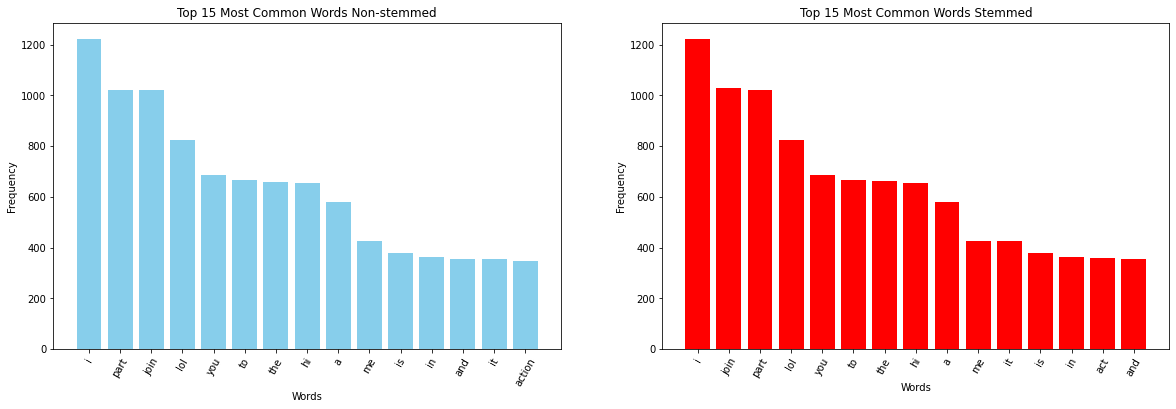

In [24]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6))
ax1.bar(tokens, tokens_count, color='skyblue')
ax2.bar(stems, stems_count, color='red')
ax1.set_xlabel("Words")
ax1.set_ylabel("Frequency")
ax1.set_title("Top 15 Most Common Words Non-stemmed")
ax1.tick_params(axis = "x", rotation=60)
ax2.set_xlabel("Words")
ax2.set_ylabel("Frequency")
ax2.set_title("Top 15 Most Common Words Stemmed")
ax2.tick_params(axis="x", rotation=60)
plt.show()



### Task1

In [44]:
import re
from nltk.stem.api import StemmerI

class CensoredStemmer(StemmerI):
    def __init__(self):
        self.endings = r'(и|ти|а|і|ий|вся|ю|є|я|е|есь|ла|ля|ння|ення|еться|ться|ли|ець)$'
        self.prefix = r'^(при|пре|по|над|роз|без|не|прі|під|пере)'
    
    def stem(self, word):
        word = re.sub(self.endings, '', word,flags=re.IGNORECASE)
        word = re.sub(self.prefix, '', word,flags=re.IGNORECASE)
        return word

stemmer = CensoredStemmer()

words = ["Бзднути", "Пребзднутий", "Прибзднути", "Надбзднутий", "підбзднути"]
stemmed_words = [stemmer.stem(word) for word in words]

print(stemmed_words)


['Бздну', 'бзднут', 'бздну', 'бзднут', 'бздну']


### Task2

Wagner-Fisher Algorithm

In [78]:
import numpy as np
def Wag_Fish(a, b):
    distance_matrix = np.zeros((len(a) + 1, len(b) + 1))
    for i in range(len(a)+1):
        distance_matrix[i][0] = i
    for j in range(len(b)+1):
        distance_matrix[0][j] = j
    for i in range(1, len(a)+1):
        for j in range(1, len(b)+1):
            if a[i-1] == b[j-1]:
                sub_cost = 0
            else:
                sub_cost = 1
            distance_matrix[i][j] = min(distance_matrix[i-1][j] + 1, distance_matrix[i][j-1] + 1, distance_matrix[i-1][j-1] + sub_cost)
    distance_df = pd.DataFrame(distance_matrix, index = [0] + list(a), columns = [0] + list(b))
    return distance_df

In [86]:
def lev(a, b):
    if len(a) == 0:
        return len(b)
    elif len(b) == 0:
        return len(a)
    elif a[0] == b[0]:
        return lev(a[1:], b[1:])
    else:
        return 1 + min(lev(a[1:], b), lev(a, b[1:]), lev(a[1:], b[1:]))

In [84]:
Wag_Fish("sitting", "kitten")

,0,k,i,t,t,e,n
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0
s,1.0,1.0,2.0,3.0,4.0,5.0,6.0
i,2.0,2.0,1.0,2.0,3.0,4.0,5.0
t,3.0,3.0,2.0,1.0,2.0,3.0,4.0
t,4.0,4.0,3.0,2.0,1.0,2.0,3.0
i,5.0,5.0,4.0,3.0,2.0,2.0,3.0
n,6.0,6.0,5.0,4.0,3.0,3.0,2.0
g,7.0,7.0,6.0,5.0,4.0,4.0,3.0


In [87]:
lev("sitting", "kitten")

3

Qwerty modification

In [88]:
qwerty_dist = pd.read_csv("keys.csv", sep = ";").astype({"Distance": "float"})
qwerty_dist

,Key1,Key2,Distance
0,A,A,0.00
1,A,B,87.82
2,A,C,51.29
3,A,D,38.10
4,A,E,38.40
...,...,...,...
671,Z,V,57.15
672,Z,W,38.40
673,Z,X,19.05
674,Z,Y,89.48


In [94]:
median = qwerty_dist["Distance"].median()
median

56.445

In [96]:
qwerty_dist["Sub_cost"] = qwerty_dist["Distance"].map(lambda dist: 0 if dist == 0 else 1 if dist < median else 2)
qwerty_dist

,Key1,Key2,Distance,Sub_cost
0,A,A,0.00,0
1,A,B,87.82,2
2,A,C,51.29,1
3,A,D,38.10,1
4,A,E,38.40,1
...,...,...,...,...
671,Z,V,57.15,2
672,Z,W,38.40,1
673,Z,X,19.05,1
674,Z,Y,89.48,2


In [106]:
import numpy as np
def Wag_Fish_qwerty(a, b):
    distance_matrix = np.zeros((len(a) + 1, len(b) + 1))
    for i in range(len(a)+1):
        distance_matrix[i][0] = i
    for j in range(len(b)+1):
        distance_matrix[0][j] = j
    for i in range(1, len(a)+1
                  ):
        for j in range(1, len(b)+1):
            if a[i-1] == b[j-1]:
                sub_cost = 0
            else:
                sub_cost = qwerty_dist["Sub_cost"][(qwerty_dist["Key1"] == a[i-1].capitalize()) & (qwerty_dist["Key2"] == b[j-1].capitalize())].iloc[0]
            distance_matrix[i][j] = min(distance_matrix[i-1][j] + 1, distance_matrix[i][j-1] + 1, distance_matrix[i-1][j-1] + sub_cost)
    distance_df = pd.DataFrame(distance_matrix, index = [0] + list(a), columns = [0] + list(b))
    return distance_df

In [107]:
Wag_Fish_qwerty("home", "jome")

,0,j,o,m,e
0,0.0,1.0,2.0,3.0,4.0
h,1.0,1.0,2.0,3.0,4.0
o,2.0,2.0,1.0,2.0,3.0
m,3.0,3.0,2.0,1.0,2.0
e,4.0,4.0,3.0,2.0,1.0


In [108]:
Wag_Fish_qwerty("home", "zome")

,0,z,o,m,e
0,0.0,1.0,2.0,3.0,4.0
h,1.0,2.0,2.0,3.0,4.0
o,2.0,3.0,2.0,3.0,4.0
m,3.0,4.0,3.0,2.0,3.0
e,4.0,4.0,4.0,3.0,2.0


Transpose modification

In [111]:
def Wag_Fish_transpose(a, b):
    distance_matrix = np.zeros((len(a) + 1, len(b) + 1))
    for i in range(len(a)+1):
        distance_matrix[i][0] = i
    for j in range(len(b)+1):
        distance_matrix[0][j] = j
    for i in range(1, len(a)+1):
        for j in range(1, len(b)+1):
            if a[i-1] == b[j-1]:
                sub_cost = 0
            else:
                sub_cost = 1
            if i > 1 and j > 1 and a[i-1] == b[j-2] and a[i-2] == b [j-1]:
                transpose = True
            else:
                transpose = False
            distance_matrix[i][j] = min(distance_matrix[i-1][j] + 1, distance_matrix[i][j-1] + 1, distance_matrix[i-1][j-1] + sub_cost, 1000 if not transpose else distance_matrix[i-2][j-2] + sub_cost)
    distance_df = pd.DataFrame(distance_matrix, index = [0] + list(a), columns = [0] + list(b))
    return distance_df

In [119]:
Wag_Fish_transpose("home","hoem")

,0,h,o,e,m
0,0.0,1.0,2.0,3.0,4.0
h,1.0,0.0,1.0,2.0,3.0
o,2.0,1.0,0.0,1.0,2.0
m,3.0,2.0,1.0,1.0,1.0
e,4.0,3.0,2.0,1.0,1.0
